# Parkisons Disease Prediction

#### Prediction Type : Classification

#### Citiation: Little, M. (2007). Parkinsons [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C59C74.

#### Has missing value already: NO

#### Target Columns ('status') : 1 (affected from parkison disease), 0 (healthy)


#### Objective: To evaluate the accuracy of a Decision Tree Classifier model by performing a train-test split, both before and after applying oversampling techniques.

## Installation of UCIMLREPO Module

In [1]:
%pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Loading Dataset 'Parkisons'

In [10]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
parkinsons = fetch_ucirepo(id=174) 
  
# data (as pandas dataframes) 
X = parkinsons.data.features 
y = parkinsons.data.targets 


#### Metadata 

In [13]:
# metadata 
print(parkinsons.metadata) 

{'uci_id': 174, 'name': 'Parkinsons', 'repository_url': 'https://archive.ics.uci.edu/dataset/174/parkinsons', 'data_url': 'https://archive.ics.uci.edu/static/public/174/data.csv', 'abstract': "Oxford Parkinson's Disease Detection Dataset", 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 197, 'num_features': 22, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['status'], 'index_col': ['name'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2007, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C59C74', 'creators': ['Max Little'], 'intro_paper': {'ID': 385, 'type': 'NATIVE', 'title': 'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', 'authors': 'Max A. Little, P. McSharry, S. Roberts, D. Costello, I. Moroz', 'venue': 'BioMedical Engineering OnLine', 'year': 2007, 'journal': None, 'DOI': '10.1186/1475-925X-6-23', 'URL

#### Downloading CSV

In [15]:
!wget https://archive.ics.uci.edu/static/public/174/data.csv



7[https://archive.ics.uci.edu/st]87[Files: 0  Bytes: 0  [0 B/s] Re]87Saving 'data.csv.1'
87data.csv.1           100% [=============================>]   43.65K    --.-KB/s87HTTP response 200 OK [https://archive.ics.uci.edu/static/public/174/data.csv]
87data.csv.1           100% [=============================>]   43.65K    --.-KB/s87[Files: 1  Bytes: 43.65K [29.35]8

#### Features Info

In [16]:
# variable information 
print(parkinsons.variables) 

            name     role         type demographic description units  \
0           name       ID  Categorical        None        None  None   
1        MDVP:Fo  Feature   Continuous        None        None    Hz   
2       MDVP:Fhi  Feature   Continuous        None        None    Hz   
3       MDVP:Flo  Feature   Continuous        None        None    Hz   
4    MDVP:Jitter  Feature   Continuous        None        None     %   
5    MDVP:Jitter  Feature   Continuous        None        None   Abs   
6       MDVP:RAP  Feature   Continuous        None        None  None   
7       MDVP:PPQ  Feature   Continuous        None        None  None   
8     Jitter:DDP  Feature   Continuous        None        None  None   
9   MDVP:Shimmer  Feature   Continuous        None        None  None   
10  MDVP:Shimmer  Feature   Continuous        None        None    dB   
11  Shimmer:APQ3  Feature   Continuous        None        None  None   
12  Shimmer:APQ5  Feature   Continuous        None        None  

#### Shape of Data

In [22]:
X.shape

(195, 22)

In [23]:
y.shape
#y is a label column 'status'

(195, 1)

## Class Distribution

In [26]:
import pandas as pd
import numpy as np

In [28]:
dataset = pd.read_csv("data.csv")

# Check the distribution of classes
class_distribution = dataset['status'].value_counts()
print("Class Distribution:")
print(class_distribution)

# Calculate percentage distribution for better insights
percentage_distribution = (class_distribution / class_distribution.sum()) * 100
print("\nPercentage Distribution:")
print(percentage_distribution)

Class Distribution:
status
1    147
0     48
Name: count, dtype: int64

Percentage Distribution:
status
1    75.384615
0    24.615385
Name: count, dtype: float64


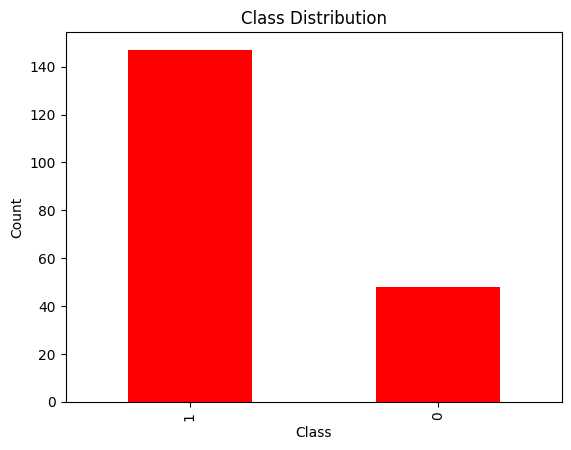

In [42]:
import matplotlib.pyplot as plt

# Bar plot for class distribution
plt.figure() 
class_distribution.plot(kind='bar', color='red')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

## Histogram Plot

In [36]:
import pandas as pd

df = pd.concat([X,y],axis=1)
df

,MDVP:Fo,MDVP:Fhi,MDVP:Flo,MDVP:Jitter,MDVP:Jitter,MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00784,0.00370,0.00554,0.01109,0.04374,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00968,0.00465,0.00696,0.01394,0.06134,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.01050,0.00544,0.00781,0.01633,0.05233,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00997,0.00502,0.00698,0.01505,0.05492,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.01284,0.00655,0.00908,0.01966,0.06425,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00459,0.00263,0.00259,0.00790,0.04087,0.04087,...,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,0
191,209.516,253.017,89.488,0.00564,0.00564,0.00331,0.00292,0.00994,0.02751,0.02751,...,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,0
192,174.688,240.005,74.287,0.01360,0.01360,0.00624,0.00564,0.01873,0.02308,0.02308,...,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,0
193,198.764,396.961,74.904,0.00740,0.00740,0.00370,0.00390,0.01109,0.02296,0.02296,...,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,0


MDVP:Fo


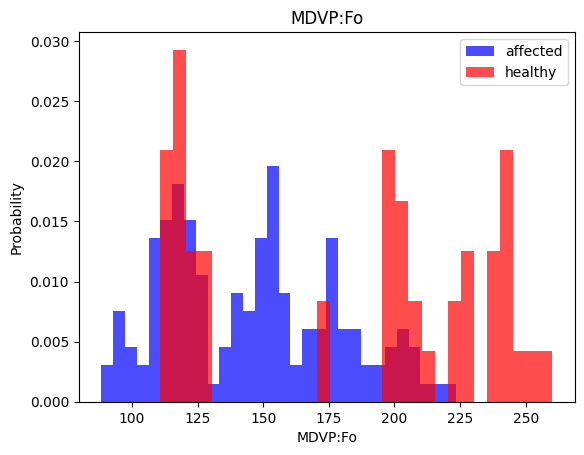

MDVP:Fhi


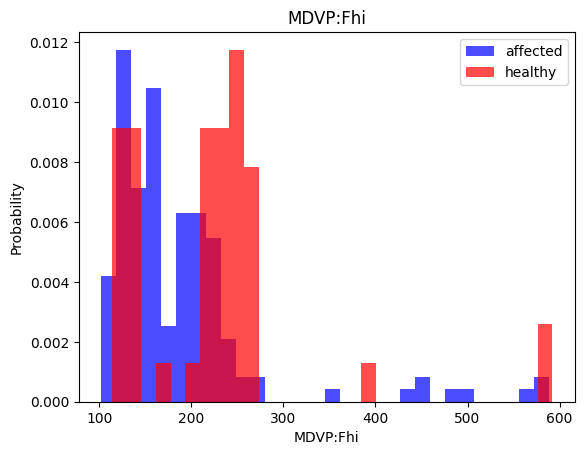

MDVP:Flo


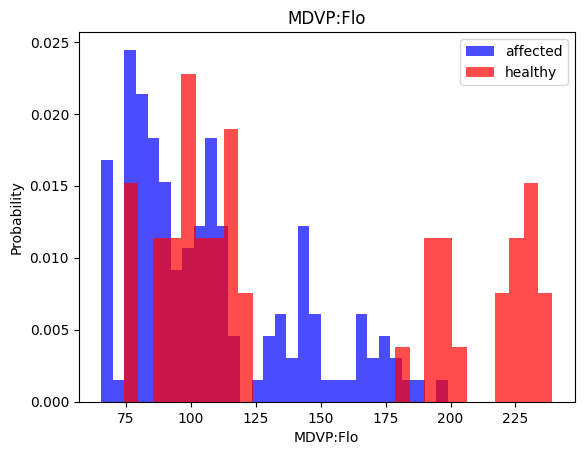

MDVP:Jitter
Skipping non-numeric column: MDVP:Jitter
MDVP:Jitter
Skipping non-numeric column: MDVP:Jitter
MDVP:RAP


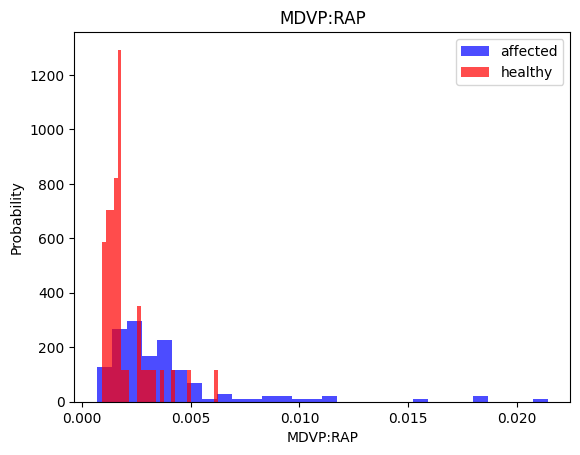

MDVP:PPQ


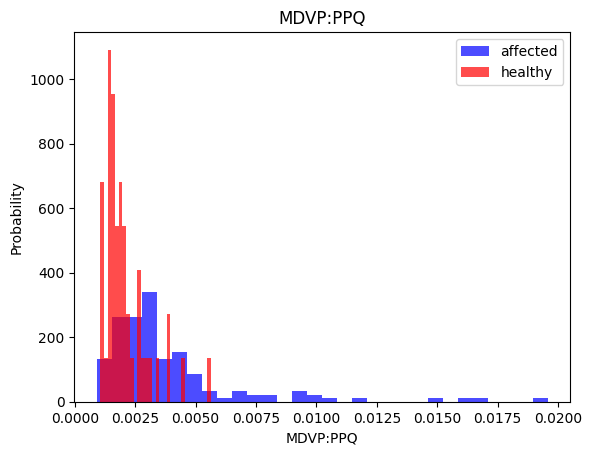

Jitter:DDP


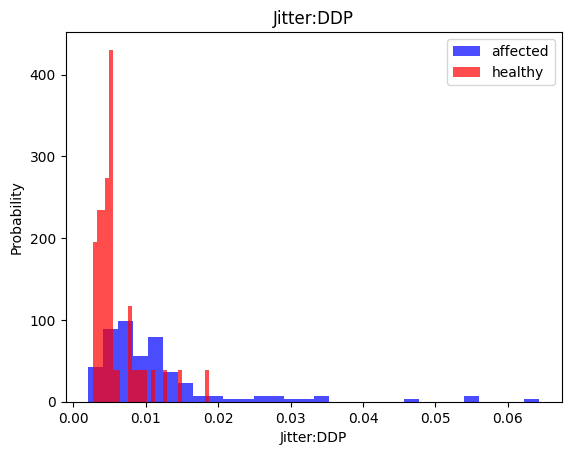

MDVP:Shimmer
Skipping non-numeric column: MDVP:Shimmer
MDVP:Shimmer
Skipping non-numeric column: MDVP:Shimmer
Shimmer:APQ3


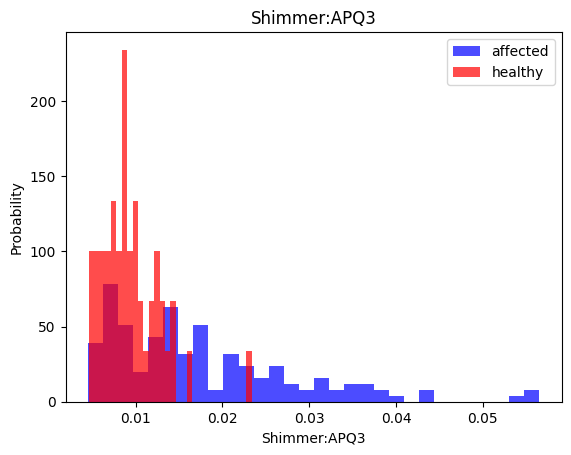

Shimmer:APQ5


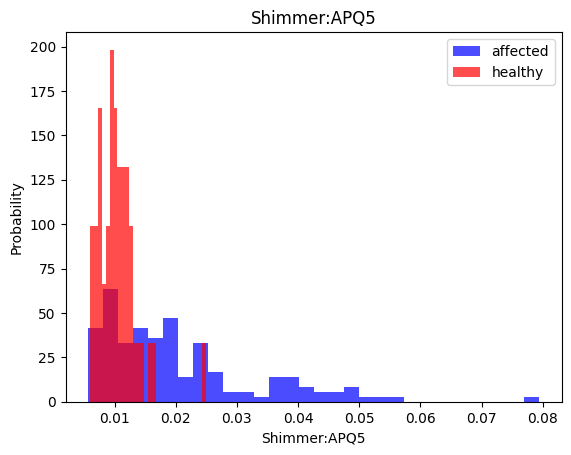

MDVP:APQ


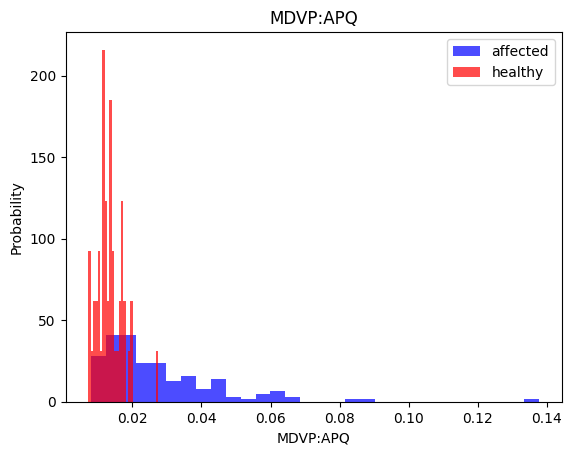

Shimmer:DDA


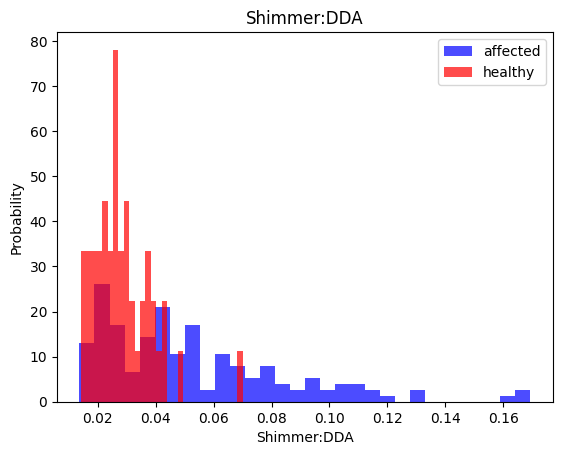

NHR


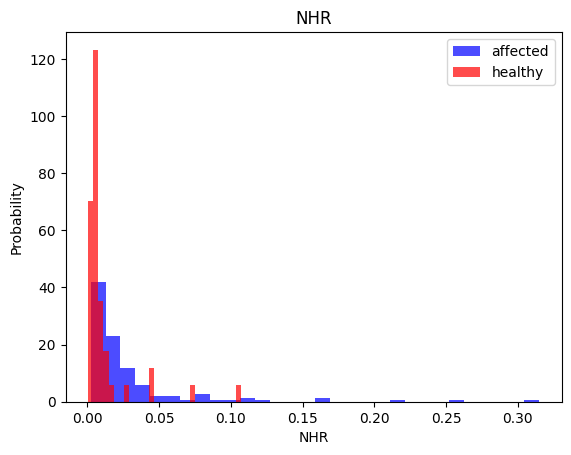

HNR


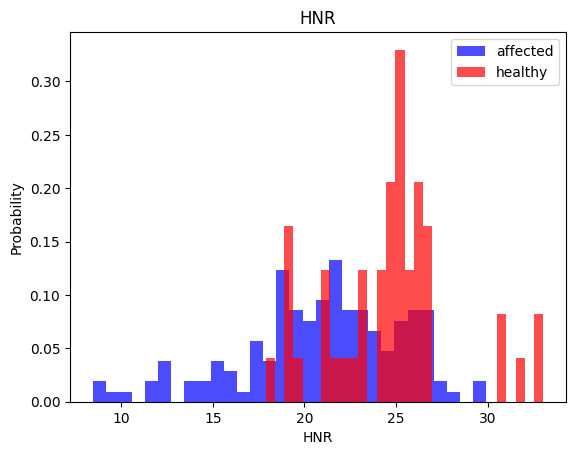

RPDE


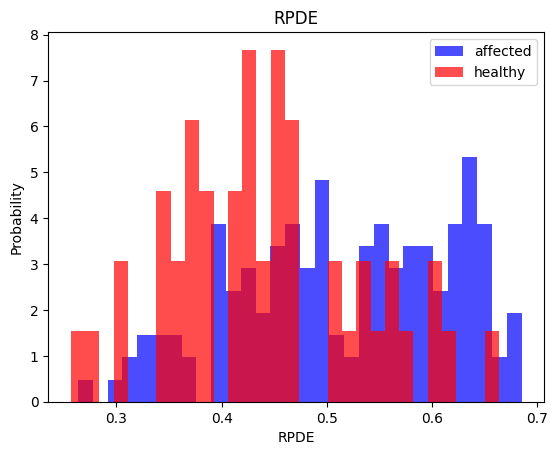

DFA


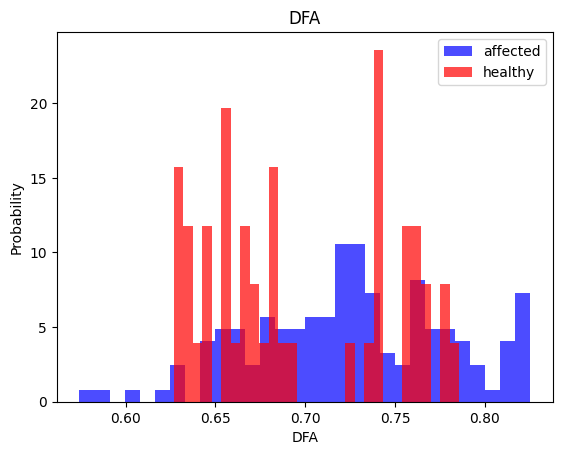

spread1


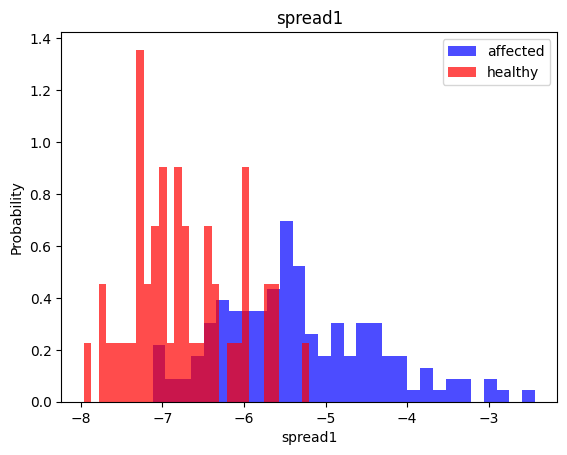

spread2


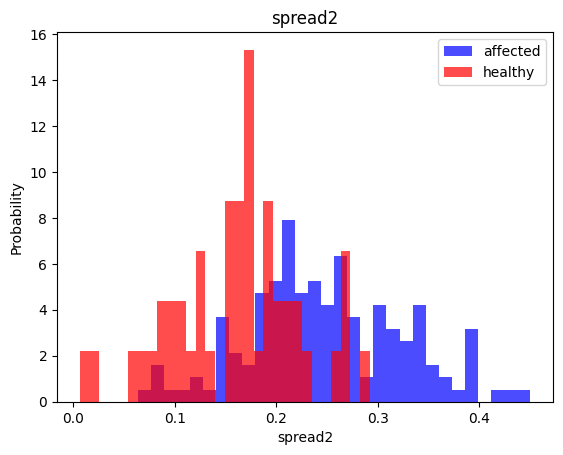

D2


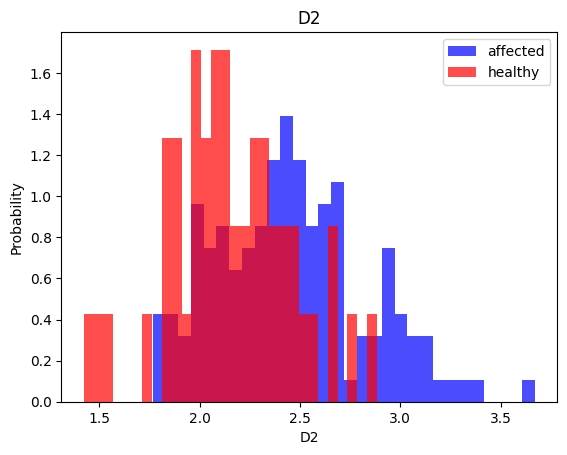

PPE


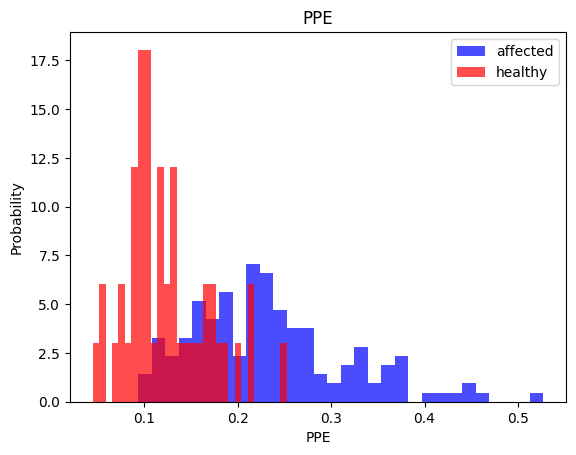

In [50]:
for feature in df.columns[:-1]:
    print(feature)
    if not pd.api.types.is_numeric_dtype(df[feature]):
        print(f"Skipping non-numeric column: {feature}")
        continue  

    plt.figure()  # Create a new figure for each plot
    plt.hist(df[df["status"] == 1][feature], bins=30, color='blue', label='affected', alpha=0.7, density=True)
    plt.hist(df[df["status"] == 0][feature], bins=30, color='red', label='healthy', alpha=0.7, density=True)
    plt.title(feature)
    plt.ylabel("Probability")
    plt.xlabel(feature)
    plt.legend()
    plt.show()

In [52]:
X.head()

,MDVP:Fo,MDVP:Fhi,MDVP:Flo,MDVP:Jitter,MDVP:Jitter,MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00784,0.00370,0.00554,0.01109,0.04374,0.04374,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00968,0.00465,0.00696,0.01394,0.06134,0.06134,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.01050,0.00544,0.00781,0.01633,0.05233,0.05233,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00997,0.00502,0.00698,0.01505,0.05492,0.05492,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.01284,0.00655,0.00908,0.01966,0.06425,0.06425,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [53]:
y.head()

,status
0,1
1,1
2,1
3,1
4,1


## Train, Validation, Test Sets

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=58)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [151]:
X_train.shape

(117, 22)

In [152]:
X_test.shape

(39, 22)

## Scaling and Oversampling

In [153]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [154]:
from imblearn.over_sampling import RandomOverSampler
def scaleDataset(features, labels, oversample = False):
        X = features.values
        y = labels.values
        scaler = StandardScaler()
        X = scaler.fit_transform(X);
        if oversample:
            ros = RandomOverSampler()
            X, y = ros.fit_resample(X, y)
        return X, y

In [155]:
X_trainNormalized, y_trainNormalized = scaleDataset(X_train, y_train)
X_validNormalized, y_validNormalized = scaleDataset(X_val, y_val)
X_testNormalized, y_testNormalized = scaleDataset(X_test, y_test)

In [156]:
(y_train==1).sum(), (y_train==0).sum()

(status    83
 dtype: int64,
 status    34
 dtype: int64)

In [157]:
X_trainOversampledScaled, y_trainOversampledScaled = scaleDataset(X_train, y_train, oversample=True)
X_validOversampledScaled, y_validOversampledScaled = scaleDataset(X_val, y_val, oversample=False)
X_testOversampledScaled, y_testOversampledScaled = scaleDataset (X_test, y_test, oversample=False)

In [158]:
(y_trainOversampledScaled==1).sum(), (y_trainOversampledScaled==0).sum()

(83, 83)

## Decision Tree Classifier

In [159]:
from sklearn.tree import DecisionTreeClassifier

In [160]:
def tree_using_gini(X_train, y_train):
    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state=100)
    clf_gini.fit(X_train, y_train)
    return clf_gini

### Classification Reports 

#### 1. Normal (Not Scaled Data)

In [161]:
from sklearn.metrics import classification_report

notScaled = tree_using_gini(X_train, y_train)
y_predict = notScaled.predict(X_test)

classficiation_report_01 = classification_report(y_test, y_predict)
print("Classification Report:\n", classficiation_report_01)

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.75      0.63         8
           1       0.93      0.84      0.88        31

    accuracy                           0.82        39
   macro avg       0.74      0.79      0.76        39
weighted avg       0.85      0.82      0.83        39



#### 2. Scaled Data 

In [162]:
from sklearn.metrics import classification_report

scaled = tree_using_gini(X_trainNormalized, y_trainNormalized)
y_predict2 = scaled.predict(X_testNormalized)

classficiation_report_02 = classification_report(y_testNormalized, y_predict2)
print("Classification Report:\n", classficiation_report_02)

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.75      0.60         8
           1       0.93      0.81      0.86        31

    accuracy                           0.79        39
   macro avg       0.71      0.78      0.73        39
weighted avg       0.84      0.79      0.81        39



#### 3. Scaled and Oversampled Data 

In [163]:
from sklearn.metrics import classification_report

ScaledAndOversampled = tree_using_gini(X_trainOversampledScaled, y_trainOversampledScaled)
y_predict3 = ScaledAndOversampled.predict(X_testOversampledScaled)

classficiation_report_03 = classification_report(y_testOversampledScaled, y_predict3)
print("Classification Report:\n", classficiation_report_03)

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       0.96      0.87      0.92        31

    accuracy                           0.87        39
   macro avg       0.80      0.87      0.83        39
weighted avg       0.90      0.87      0.88        39

